# VacationPy
---

## Starter Code to Import Libraries and Load the Weather and Coordinates Data

In [12]:
!pip install citipy

Could not fetch URL https://pypi.org/simple/pip/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/pip/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1000)'))) - skipping


In [13]:
# Dependencies and Setup
import hvplot.pandas
import pandas as pd
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
import time
from citipy import citipy
from scipy.stats import linregress

# Import API key
from api_keys import geoapify_key 

In [14]:
# Load the CSV file created in Part 1 into a Pandas DataFrame
city_data_df = pd.read_csv("output_data/cities.csv")

# Display sample data
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,key west,24.5557,-81.7826,26.67,87,100,1.34,US,1728997217
1,1,sisimiut,66.9395,-53.6735,-1.29,75,98,1.83,GL,1728997470
2,2,kulachi,31.9286,70.4592,32.75,14,0,1.73,PK,1728997471
3,3,nadym,65.5333,72.5167,0.51,92,100,2.05,RU,1728997406
4,4,saidpur,25.7777,88.8917,25.35,76,28,1.76,BD,1728997473


---

### Step 1: Create a map that displays a point for every city in the `city_data_df` DataFrame. The size of the point should be the humidity in each city.

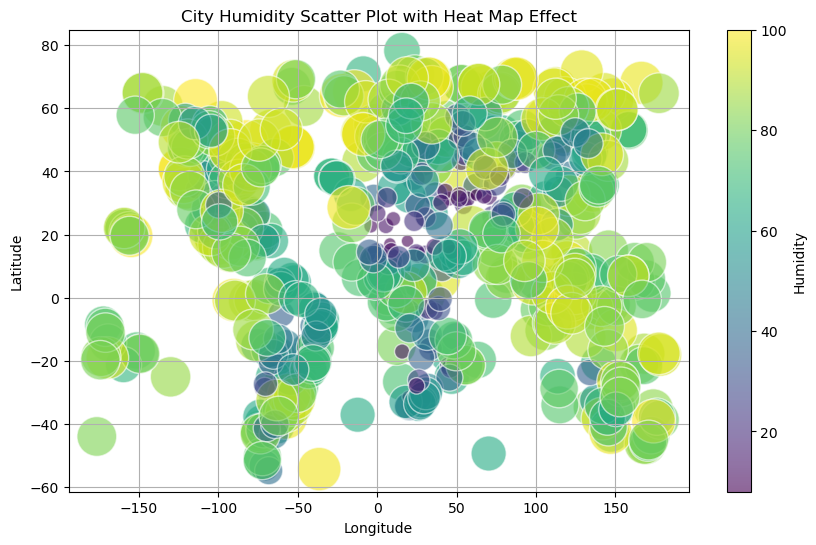

In [24]:


# Create a scatter plot with heat map effect based on humidity
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    city_data_df['Lng'],  # Longitude
    city_data_df['Lat'],  # Latitude
    s=city_data_df['Humidity'] * 10,  # Size of the points based on humidity (scaled for visibility)
    c=city_data_df['Humidity'],  # Color of the points based on humidity
    cmap='viridis',  # Colormap for the heat map effect
    alpha=0.6,  # Transparency of the points
    edgecolors='w'  # White edge color for better visibility
)

# Add a color bar to show the humidity scale
plt.colorbar(scatter, label='Humidity')

# Add labels and title
plt.title('City Humidity Scatter Plot with Heat Map Effect')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show the plot
plt.grid()
plt.show()

### Step 2: Narrow down the `city_data_df` DataFrame to find your ideal weather condition

In [25]:
# Narrow down cities that fit criteria and drop any results with null values
# Filter cities with humidity between 40 and 60
filtered_cities_df = city_data_df[
    (city_data_df['Humidity'] >= 40) & (city_data_df['Humidity'] <= 60) &
    (city_data_df['Max Temp'] >= 20) & (city_data_df['Max Temp'] <= 26) &
    (city_data_df['Wind Speed'] >= 0) & (city_data_df['Wind Speed'] <= 4)
    ]

# Drop rows with null values
city_data_df = city_data_df.dropna()

# Display sample data
filtered_cities_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
278,278,mpika,-11.8343,31.4529,23.08,49,100,2.88,ZM,1728997783
281,281,genzano di roma,41.7013,12.6918,25.45,60,0,1.34,IT,1728997787
394,394,luohe,33.5717,114.0353,23.30,50,99,2.99,CN,1728997913
435,435,general conesa,-40.1000,-64.4333,20.59,42,0,2.97,AR,1728997959
465,465,mizque,-17.9410,-65.3402,23.14,46,100,1.08,BO,1728997916


### Step 3: Create a new DataFrame called `hotel_df`.

In [26]:
# Use the Pandas copy function to create DataFrame called hotel_df to store the city, country, coordinates, and humidity
hotel_df = filtered_cities_df[['City', 'Country', 'Lat', 'Lng', 'Humidity']].copy()


# Add an empty column, "Hotel Name," to the DataFrame so you can store the hotel found using the Geoapify API
# Add an empty column, "Hotel Name," to the DataFrame
hotel_df['Hotel Name'] = '' 

# Display sample data
hotel_df.head()

,City,Country,Lat,Lng,Humidity,Hotel Name
278,mpika,ZM,-11.8343,31.4529,49,
281,genzano di roma,IT,41.7013,12.6918,60,
394,luohe,CN,33.5717,114.0353,50,
435,general conesa,AR,-40.1000,-64.4333,42,
465,mizque,BO,-17.9410,-65.3402,46,


### Step 4: For each city, use the Geoapify API to find the first hotel located within 10,000 metres of your coordinates.

In [27]:
# Function to find the first hotel using the Geoapify API
def find_hotel(api_key, lat, lon):
    # Define the URL for the Geoapify Places API
    url = f"https://api.geoapify.com/v2/places?lat={lat}&lon={lon}&filter=category:hotel&limit=1&apiKey={api_key}"

    # Make a request to the Geoapify API
    response = requests.get(url)

In [29]:
# Set parameters to search for a hotel
radius = 10000  # Set the radius to 10,000 meters
params = {
    "lat": None,  
    "lon": None,  
    "filter": "category:hotel",  
    "limit": 1,  # Limit the results to the first hotel found
    "apiKey": geoapify_key  # Your Geoapify API key
}

# Print a message to follow up the hotel search
print("Starting hotel search")

# Iterate through the hotel_df DataFrame
for index, row in hotel_df.iterrows():
    # get latitude, longitude from the DataFrame
    # YOUR CODE HERE

    # Add the current city's latitude and longitude to the params dictionary
    params["filter"] = # YOUR CODE HERE
    params["bias"] = # YOUR CODE HERE

    # Set base URL
    base_url = "https://api.geoapify.com/v2/places"

    # Make and API request using the params dictionary
    name_address = # YOUR CODE HERE

    # Convert the API response to JSON format
    name_address = # YOUR CODE HERE

    # Grab the first hotel from the results and store the name in the hotel_df DataFrame
    try:
        hotel_df.loc[index, "Hotel Name"] = name_address["features"][0]["properties"]["name"]
    except (KeyError, IndexError):
        # If no hotel is found, set the hotel name as "No hotel found".
        hotel_df.loc[index, "Hotel Name"] = "No hotel found"

    # Log the search results
    print(f"{hotel_df.loc[index, 'City']} - nearest hotel: {hotel_df.loc[index, 'Hotel Name']}")

# Display sample data
hotel_df

SyntaxError: invalid syntax (1057211145.py, line 20)

### Step 5: Add the hotel name and the country as additional information in the hover message for each city in the map.

In [7]:
%%capture --no-display

# Configure the map plot
# YOUR CODE HERE

# Display the map
# YOUR CODE HERE

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Lng,Lat]   (City,Humidity,Hotel Name,Country)